##1. Importando Dataset

In [ ]:
from time import time
import random

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
english_dataset = pd.read_csv('/content/drive/MyDrive/Data Augmentation/data/en-dataset.csv', encoding='latin-1', names=["target", "id", "date", "flag", "user", "text"])
english_dataset

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
english_dataset['target'].value_counts()

0    800000
4    800000
Name: target, dtype: int64

In [ ]:
df = english_dataset[['target', 'text']]
df.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df_pos = df[df['target'] == 4]
df_neg = df[df['target'] == 0]
print(len(df_pos), len(df_neg))

800000 800000


In [ ]:
#Teste

df_pos = df_pos.iloc[:int(len(df_pos)/4)]
df_neg = df_neg.iloc[:int(len(df_neg)/4)]
print(len(df_pos), len(df_neg))

200000 200000


##2. Tratamento dos dados

In [ ]:
start_time = time()

from nltk.tokenize import TweetTokenizer
#reduce_len nao permite a repeticao do mesmo caractere por mais de 3x | 'Helloooooooooo' => 'Hellooo'
tk = TweetTokenizer(reduce_len=True)
data = []

# Melhorar o processamento
X = df['text'].tolist()
Y = df['target'].tolist()

# Criando uma Tuple (sentenca tokenizes, target)
for x, y in zip(X, Y):
    if y == 4:
        data.append((tk.tokenize(x), 1))
    else:
        data.append((tk.tokenize(x), 0))
        

print('Tempo de Processamento:', time() - start_time)
data[:5]

Tempo de Processamento: 176.38177371025085


[(['@switchfoot',
   'http://twitpic.com/2y1zl',
   '-',
   'Awww',
   ',',
   "that's",
   'a',
   'bummer',
   '.',
   'You',
   'shoulda',
   'got',
   'David',
   'Carr',
   'of',
   'Third',
   'Day',
   'to',
   'do',
   'it',
   '.',
   ';D'],
  0),
 (['is',
   'upset',
   'that',
   'he',
   "can't",
   'update',
   'his',
   'Facebook',
   'by',
   'texting',
   'it',
   '...',
   'and',
   'might',
   'cry',
   'as',
   'a',
   'result',
   'School',
   'today',
   'also',
   '.',
   'Blah',
   '!'],
  0),
 (['@Kenichan',
   'I',
   'dived',
   'many',
   'times',
   'for',
   'the',
   'ball',
   '.',
   'Managed',
   'to',
   'save',
   '50',
   '%',
   'The',
   'rest',
   'go',
   'out',
   'of',
   'bounds'],
  0),
 (['my',
   'whole',
   'body',
   'feels',
   'itchy',
   'and',
   'like',
   'its',
   'on',
   'fire'],
  0),
 (['@nationwideclass',
   'no',
   ',',
   "it's",
   'not',
   'behaving',
   'at',
   'all',
   '.',
   "i'm",
   'mad',
   '.',
   'why',
   'a

###2.2 Lematização

In [ ]:
!pip install numpy==1.23.1
!pip install scipy==1.5.4
!pip install nltk 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement numpy==1.23.1 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0rc1, 1.13.0rc2, 1.13.0, 1.13.1, 1.13.3, 1.14.0rc1, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0rc1, 1.15.0rc2, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0rc1, 1.16.0rc2, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0rc1, 1.17.0rc2, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0rc1, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0rc1, 1.19.0rc2, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0rc1, 1.20.0rc2, 1.20.0, 1.20.1, 1.20.2, 1.20.3, 1.21.0rc1, 1.21.0rc2, 1.21.0, 1.21.1, 1.21.2, 1.21.3, 1.21.4, 1.21.5, 1.21.6)
ERROR: No matching 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer

print(pos_tag(data[0][0]))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


[('@switchfoot', 'NN'), ('http://twitpic.com/2y1zl', 'SYM'), ('-', ':'), ('Awww', 'NNP'), (',', ','), ("that's", 'VBZ'), ('a', 'DT'), ('bummer', 'NN'), ('.', '.'), ('You', 'PRP'), ('shoulda', 'VBP'), ('got', 'VBD'), ('David', 'NNP'), ('Carr', 'NNP'), ('of', 'IN'), ('Third', 'NNP'), ('Day', 'NNP'), ('to', 'TO'), ('do', 'VB'), ('it', 'PRP'), ('.', '.'), (';D', 'VB')]


In [ ]:
def lemmatize_sentence(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(tokens):
#converter pos_tag => tag para o WordNetLemmatizer poder interpretar
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word, pos))
    return lemmatized_sentence

# Previewing the WordNetLemmatizer() output
print(lemmatize_sentence(data[0][0]))

['@switchfoot', 'http://twitpic.com/2y1zl', '-', 'Awww', ',', "that's", 'a', 'bummer', '.', 'You', 'shoulda', 'get', 'David', 'Carr', 'of', 'Third', 'Day', 'to', 'do', 'it', '.', ';D']


## Limpando os dados

In [ ]:
import re, string
from nltk.corpus import stopwords
nltk.download('stopwords')
STOP_WORDS = stopwords.words('english')

def cleaned(token):
    if token == 'u':
        return 'you'
    if token == 'r':
        return 'are'
    if token == 'some1':
        return 'someone'
    if token == 'yrs':
        return 'years'
    if token == 'hrs':
        return 'hours'
    if token == 'mins':
        return 'minutes'
    if token == 'secs':
        return 'seconds'
    if token == 'pls' or token == 'plz':
        return 'please'
    if token == '2morow':
        return 'tomorrow'
    if token == '2day':
        return 'today'
    if token == '4got' or token == '4gotten':
        return 'forget'
    if token == 'amp' or token == 'quot' or token == 'lt' or token == 'gt' or token == '½25':
        return ''
    return token

def remove_noise(tweet_tokens):
    cleaned_tokens = []

    for token, tag in pos_tag(tweet_tokens):
        # Tirar Link
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        # Tirar Mencao
        token = re.sub("(@[A-Za-z0-9_]+)","", token)

        if tag.startswith("NN"):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'

        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)

        cleaned_token = cleaned(token.lower())
        
        # Tirar Tokens < 3 - Tirar pontuacoes e stop words
        if cleaned_token not in string.punctuation and len(cleaned_token) > 2 and cleaned_token not in STOP_WORDS:
            cleaned_tokens.append(cleaned_token)
            
    return cleaned_tokens

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(remove_noise(data[0][0]))

['awww', "that's", 'bummer', 'shoulda', 'get', 'david', 'carr', 'third', 'day']


In [ ]:
start_time = time()

# Como os classificadores Bayesianos aceitam dicionarios como input, vamos transformar os dados 
def list_to_dict(cleaned_tokens):
    return dict([token, True] for token in cleaned_tokens)

cleaned_tokens_list = []

# Tratando data
for tokens, label in data:
    cleaned_tokens_list.append((remove_noise(tokens), label))

print('Tratamento dos dados, Tempo de Processamento::', time() - start_time)
start_time = time()
final_data = []

# Transformando para um modelo aceito do Naive Bayesian classifier
for tokens, label in cleaned_tokens_list:
    final_data.append((list_to_dict(tokens), label))
    
print('Dados preparados para o modelo, Tempo de Processamento::', time() - start_time)
final_data[:5]

Tratamento dos dados, Tempo de Processamento:: 1820.6357905864716
Dados preparados para o modelo, Tempo de Processamento:: 8.273714303970337


[({'awww': True,
   "that's": True,
   'bummer': True,
   'shoulda': True,
   'get': True,
   'david': True,
   'carr': True,
   'third': True,
   'day': True},
  0),
 ({'upset': True,
   "can't": True,
   'update': True,
   'facebook': True,
   'texting': True,
   '...': True,
   'might': True,
   'cry': True,
   'result': True,
   'school': True,
   'today': True,
   'also': True,
   'blah': True},
  0),
 ({'dive': True,
   'many': True,
   'time': True,
   'ball': True,
   'managed': True,
   'save': True,
   'rest': True,
   'bound': True},
  0),
 ({'whole': True,
   'body': True,
   'feel': True,
   'itchy': True,
   'like': True,
   'fire': True},
  0),
 ({'behave': True, "i'm": True, 'mad': True, "can't": True, 'see': True}, 0)]

Palavras Positivas


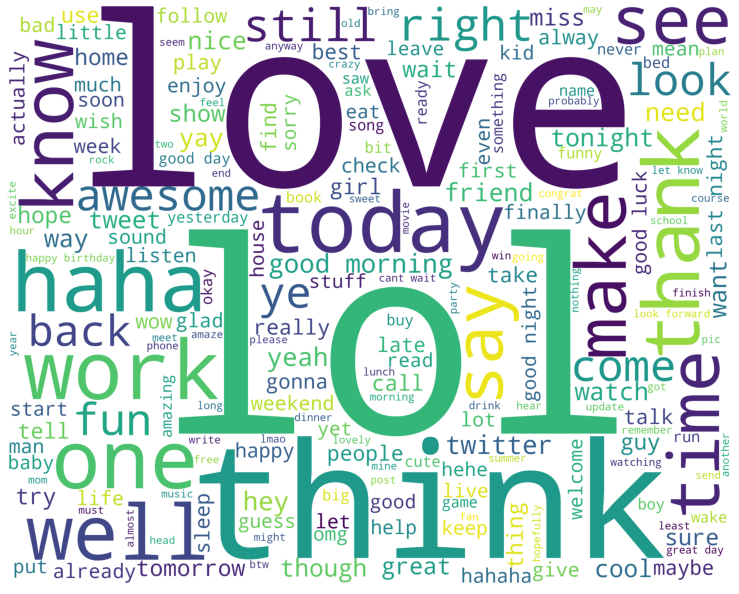

Palavras Negativas


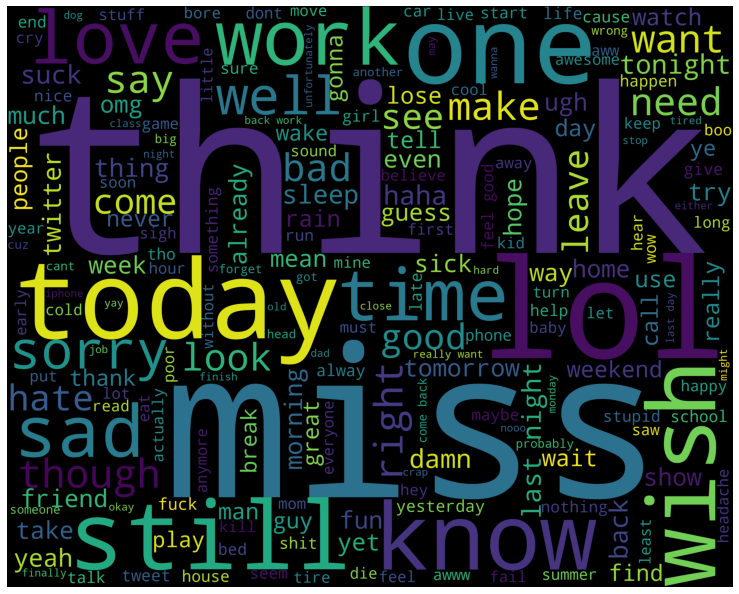

Tempo de Processamento: 148.8847851753235


In [ ]:
from wordcloud import WordCloud, STOPWORDS

start_time = time()

positive_words = []
negative_words = []

for i in range(len(cleaned_tokens_list)):
    if cleaned_tokens_list[i][1] == 1:
        positive_words.extend(cleaned_tokens_list[i][0])
    else:
        negative_words.extend(cleaned_tokens_list[i][0])

def wordcloud_draw(data, color = 'black'):
    wordcloud = WordCloud(stopwords = STOPWORDS,
                          background_color = color,
                          width = 2500,
                          height = 2000
                         ).generate(' '.join(data))
    plt.figure(1, figsize = (13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Palavras Positivas")
wordcloud_draw(positive_words, 'white')
print("Palavras Negativas")
wordcloud_draw(negative_words)        

print('Tempo de Processamento:', time() - start_time)

## 4. Naive Bayesian Model

###4.1 Separando o Dataset

In [ ]:
random.Random(140).shuffle(final_data)
# 90% treino |  10% test
trim_index = int(len(final_data) * 0.9)

train_data = final_data[:trim_index]
test_data = final_data[trim_index:]

In [ ]:
start_time = time()

from nltk import classify
from nltk import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train_data)


print('Acuracia no treino:', classify.accuracy(classifier, train_data))
print('Acuracua no teste:', classify.accuracy(classifier, test_data))
print(classifier.show_most_informative_features(20))
print('\nTempo de Processamento:', time() - start_time)

Acuracia no treino: 0.7966743055555555
Acuracua no teste: 0.7595625
Most Informative Features
                   saddd = True                0 : 1      =     54.6 : 1.0
                dividend = True                1 : 0      =     49.0 : 1.0
                     447 = True                0 : 1      =     41.6 : 1.0
                    sadd = True                0 : 1      =     39.8 : 1.0
               upsetting = True                0 : 1      =     38.1 : 1.0
                  farrah = True                0 : 1      =     36.8 : 1.0
                  triste = True                0 : 1      =     36.3 : 1.0
                fuzzball = True                1 : 0      =     35.8 : 1.0
                feverish = True                0 : 1      =     35.7 : 1.0
                 mcmahon = True                0 : 1      =     33.4 : 1.0
                 sadface = True                0 : 1      =     33.3 : 1.0
                  sadden = True                0 : 1      =     32.2 : 1.0
      

##4.2 Avaliando o Modelo

In [ ]:
from sklearn import metrics


y = [test_data[i][1] for i in range(len(test_data))]
probs = [classifier.prob_classify(test_data[i][0]).prob(1) for i in range(len(test_data))]

print(len(y), len(probs))

fpr, tpr, thresholds = metrics.roc_curve(y, probs)

# Printing the Area Under Curve (AUC) of the ROC curve (the closer to 1, the better)
auc = metrics.roc_auc_score(y, probs)
print('AUC: %.3f' % auc)

160000 160000
AUC: 0.841


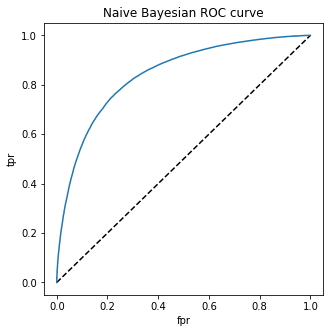

In [ ]:
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='NB')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Naive Bayesian ROC curve')
plt.show()

In [ ]:
probs = [classifier.classify(test_data[i][0]) for i in range(len(test_data))]
y = np.asarray(y)
probs = np.asarray(probs)
pd.crosstab(y, probs, rownames=['Actual'], colnames=['Predicted'], margins=True)
#1 = Positivo | 2 = Negativo

Predicted,0,1,All
Actual,,,
0,66435,13488,79923
1,24982,55095,80077
All,91417,68583,160000


##5. Testes

In [ ]:
custom_tweet = "I loved this GEAM meet! It was amazing."

custom_tokens = remove_noise(tk.tokenize(custom_tweet))

print(classifier.classify(dict([token, True] for token in custom_tokens)))

1


In [ ]:
custom_tweet = "I ordered just once from appGenericoAqui, they screwed up, never used the app again."

custom_tokens = remove_noise(tk.tokenize(custom_tweet))

print(classifier.classify(dict([token, True] for token in custom_tokens)))

0
